In [1]:
from glob import glob
import os
import pickle
import csv

import numpy as np
import matplotlib.pyplot as plt

from microfaune.audio import load_wav, wav2spc, create_spec
from microfaune.plot import plot_spec

In [2]:
fs, data = load_wav('../../toy_data/bird1.wav')

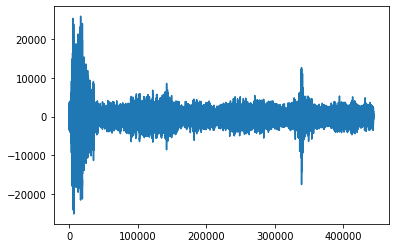

In [3]:
plt.plot(data)

In [4]:
spc = wav2spc("../../toy_data/bird1.wav")

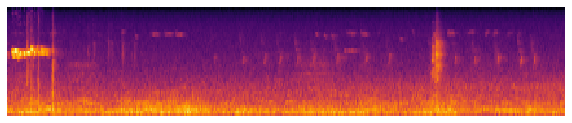

In [5]:
fig = plot_spec(spc)


# Dump all wav to spc

In [6]:
data_path = "../../data/*"
data_src_dirs = glob(data_path)
data_src_dirs

['../../data/badchallenge_testdata_wavs',
 '../../data/ff1010bird_wav',
 '../../data/warblrb10k_public_wav']

In [7]:
for d in data_src_dirs:
    print(d)
    labels_file = os.path.join(d, "labels.csv")
    if os.path.exists(labels_file):
        with open(labels_file, "r") as f:
            reader = csv.reader(f, delimiter=',')
            labels = {}
            next(reader)  # pass fields names
            for name, y in reader:
                labels[name] = y
    else:
        wav_files = glob(os.path.join(d, "wav/*.wav"))
        labels = {os.path.basename(f)[:-4]: None for f in wav_files}
    i = 1
    X = []
    Y = []
    uids = []
    for file_id, y in labels.items():
        print(f"{i:04d}/{len(labels)}: {file_id}", end="\r")
        spc = wav2spc(os.path.join(d, "wav", f"{file_id}.wav"))
        X.append(spc)
        Y.append(y)
        uids.append(file_id)
        i += 1
    print()
    with open(os.path.join(d, "mel_dataset.pkl"), "wb") as f:
        pickle.dump({"uids": uids, "X": X, "Y": Y}, f)

../../data/badchallenge_testdata_wavs
../../data/ff1010bird_wav4e43-843c
../../data/warblrb10k_public_wav
